## Aprendizado de Máquina Supervisionado - Exemplo 01

# _Feature Classification_


Técnica de reconhecimento de padrões utilizada para categorizar dados em diferentes classes.

Esse exemplo utiliza a biblioteca Python **Scikit-learn** (http://scikit-learn.org/).

**Scikit-learn** é uma biblioteca _open-source_ de _machine learning_ para Python que oferece uma variedade de algoritimos de regressão, classificação e _clustering_.

## Objetivo:
* Marcar automaticamente mensagens como _phishing_ utilizando _features_ selecionadas (propriedades individuais mensuráveis) de um coleção de e-mails (corpus).

### Dados de entrada:

**Origem:**
* emails-enron-features.csv: E-mails comuns, sem _phishing_, obtidos do Enron Corpus;
* emails-phishing-features.csv: E-mails de _phishing_.

<i>Ambos os arquivos foram criados com base em um _fork_ do projeto: https://github.com/diegoocampoh/MachineLearningPhishing</i>

**Descrição das _features_ selecionadas:**
* Html Form: (boolean) True se o e-mail contiver forms HTML;
* Number of Attachments: (numerical) Quantidade de anexos no e-mail;
* Flash content: (boolean) True se o e-mail possuir algum conteúdo em flash content;
* Html iFrame: (boolean) True se HTML iFrames forem detectados;
* HTML content: (boolean) True se conteúdo HTML for detectado;
* URLs: (numerical) Quantidade de URLS no e-mail;
* External Resources: (numerical) Quantidade de links externos no corpo do e-mail;
* Javascript: (numerical) Quantidade de blocos de Javascript no corpo do e-mail;
* Css: (numerical) Quantidade de links Css no corpo do e-mail, abaixo da tag _head_ na mensagem html;
* IPs in URLs: (boolean): True se forem detectados IPs em URLS;
* @ in URLs: (boolean) True se for encontrado o caracter '@' em URLs;
* Encoding: (text): Tipo de _encoding_ da mensagem.

**Label**
* Phishy: (boolean) True se o e-mail for considerado _phishing_.

## Sumário:

1. [Import e Load](#p1)
2. [Exploração de Dados](#p2)
3. [Preparando o Data Set](#p3)
4. [Treinamento e Teste](#p4)
5. [Exercício](#p5)
6. [Export](#p6)

<a id="p1"></a>
## 1. Import e Load

O data set é uma concatenção de dois arquivos [CSV](https://en.wikipedia.org/wiki/Comma-separated_values) criados com base no [Enron e-mail corpus](https://www.cs.cmu.edu/~enron/) e uma [coletânea de e-mails de phishing](http://monkey.org/%7Ejose/wiki/doku.php?id=PhishingCorpus).

In [ ]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn import metrics

In [ ]:
# For Google Colab (upload files first)
df = pd.concat(map(pd.read_csv, 
                   ['/content/emails-enron-features.csv', 
                    '/content/emails-phishing-features.csv']))



In [ ]:
# For docker
#df = pd.concat(map(pd.read_csv, 
#                   ['data/emails-enron-features.csv', 
#                    'data/emails-phishing-features.csv']))


In [ ]:
df.head()

,Html Form,Attachments,Flash content,Html iFrame,HTML content,URLs,External Resources,Javascript,Css,IPs in URLs,@ in URLs,Encoding,Phishy
0,False,0,False,False,True,0,0,0,0,False,False,7bit,False
1,False,0,False,False,True,0,0,0,0,False,False,7bit,False
2,False,0,False,False,True,0,0,0,0,False,False,7bit,False
3,False,0,False,False,True,0,0,0,0,False,False,7bit,False
4,False,0,False,False,True,0,0,0,0,False,False,quoted-printable,False


<a id="p2"></a>
## 2. Exploração de Dados

Etapa inicial da análise de dados, em que exploramos os dados de uma forma não estruturada a fim de descobrir padrões iniciais, características e pontos de interesse.

In [ ]:
type(df)

pandas.core.frame.DataFrame

In [ ]:
df.shape

(4000, 13)

### Verificar valores nulos

Valores nulos nos dados podem reduzir o poder estatístico de um estudo produzindo estimativas tendenciosas e levando a conclusões inválidas ([Why are missing values a problem?](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3668100/)).

In [ ]:
df.isnull().sum()

Html Form             0
Attachments           0
Flash content         0
Html iFrame           0
HTML content          0
URLs                  0
External Resources    0
Javascript            0
Css                   0
IPs in URLs           0
@ in URLs             0
Encoding              0
Phishy                0
dtype: int64

### Verificar a coluna com os dados "de sáida", rótulo *Phishy*

In [ ]:
df['Phishy'].unique()

array([False,  True])

In [ ]:
df['Phishy'].value_counts()

False    2000
True     2000
Name: Phishy, dtype: int64

Podemos observar que nesse caso específico temos um [data set balanceado](https://medium.com/analytics-vidhya/what-is-balance-and-imbalance-dataset-89e8d7f46bc5): 2000/4000 e-mails (50%) são rotulados como _Phishy_.

Isso significa que o modelo de _machine learning_ que iremos criar precisa ter um desempenho **melhor que 50%** para ser melhor do que uma escolha aleatório.

### Verificar os tipos das colunas de _features_

In [ ]:
df.dtypes

Html Form               bool
Attachments            int64
Flash content           bool
Html iFrame             bool
HTML content            bool
URLs                   int64
External Resources     int64
Javascript             int64
Css                    int64
IPs in URLs             bool
@ in URLs               bool
Encoding              object
Phishy                  bool
dtype: object

### Explorar e selecionar as _features_

A [seleção de features](https://towardsdatascience.com/feature-selection-techniques-in-machine-learning-with-python-f24e7da3f36e) é um dos principais conceitos de _machine learning_, afetando enormemente o desempenho de um modelo. As features escolhidas para treinar um modelo de ML possuem uma grande influência no desempenho e na acurácia que um modelo poderá alcançar.

In [ ]:
df[df['Phishy']==False]['URLs'].describe()

count    2000.000000
mean        1.314000
std         8.237192
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       112.000000
Name: URLs, dtype: float64

In [ ]:
df[df['Phishy']==True]['URLs'].describe()

count    2000.000000
mean       10.717500
std        15.601936
min         0.000000
25%         2.000000
50%         4.000000
75%        11.000000
max        83.000000
Name: URLs, dtype: float64

<a id="p3"></a>
## 3. Preparando o Data Set

### Definir colunas de _features_ e de rótulos

Colunas de **feature** são aquelas utiliadas para prever as colunas de **label** (rótulo).

Por **convenção**, _features_ são representadas como **X** (uppercase) e labels como **y** (lowercase).

In [ ]:
X = df[['Html Form','Attachments','Flash content','URLs','External Resources','Javascript']]
y = df['Phishy']

### Dividir os dados em conjuntos de treinamento e teste

Aqui nos vamos atribuir 70% dos dados para a fase de treinamento e 30% para a fase de teste.

Vamos utilizadr a variável de configuração `random_state` (semente de distribuição) para garantir a replicabilidade dos resultados.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

print('Training Data Shape:', X_train.shape)
print('Testing Data Shape: ', X_test.shape)

Training Data Shape: (2800, 6)
Testing Data Shape:  (1200, 6)


<a id="p4"></a>
## 4. Treinamento e Teste

Podemos testar diversos [algoritmos de classificação](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html) para comparar seus resultados, porém, para fins didáticos, vamos inicialmente utilizar um algoritimo de **Árvore de Decisão**.

### Árvore de Decisão (_Decision Tree_)

Método de aprendizado supervisionado que aprende regras de decisão simples, inferidas das _features_ selecionadas, para prever o valor de uma variável alvo (label).

Pode ser simplificado como um conjunto de regras de decisão _if-then-else_ modeladas em uma estrutura de árvore, em que as **folhas** representam os rótulos da classe (labels) e as ramificações **conjunções** de _features_ que levam a esses rótulos.

In [ ]:
# Import
from sklearn.tree import DecisionTreeClassifier

# Create 
dtc = DecisionTreeClassifier(random_state=42, max_depth=6)

# Train
dtc = dtc.fit(X_train, y_train)

Model classes: [False  True]


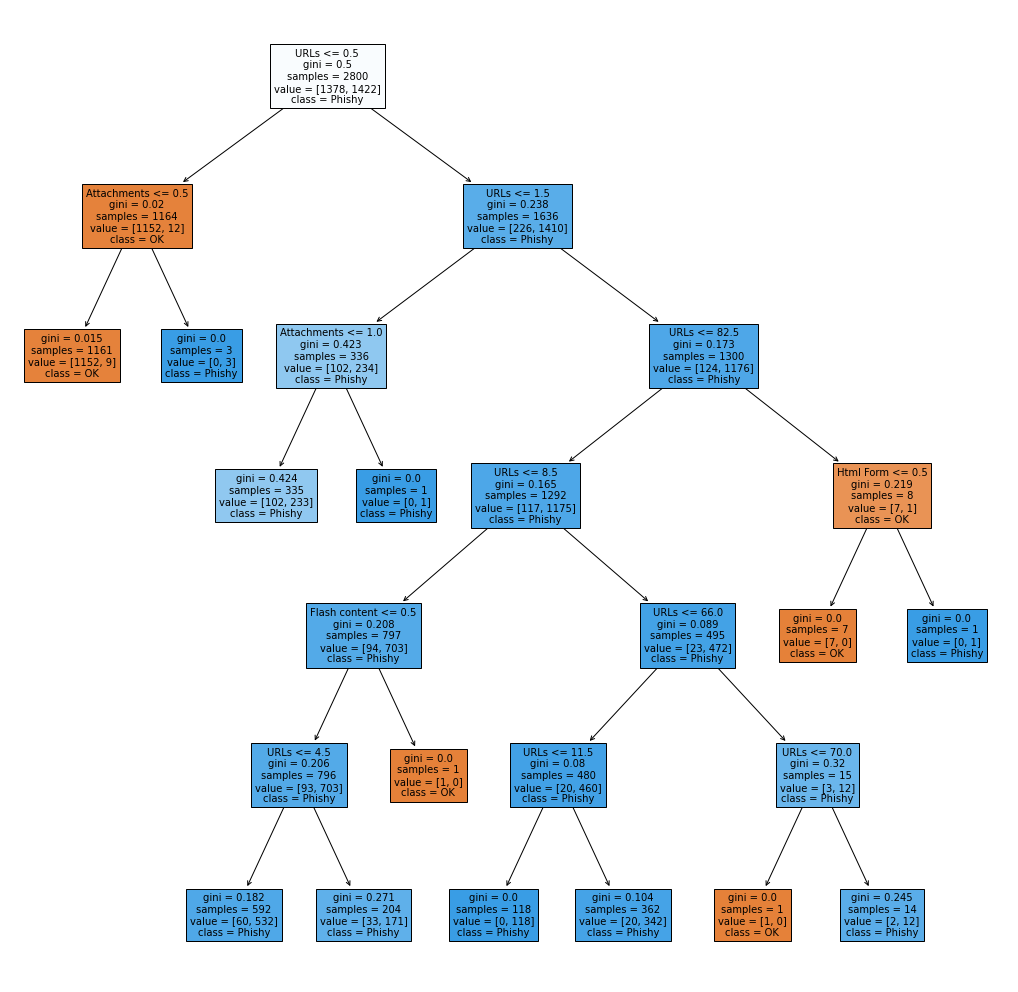

In [ ]:
# Plot Decision Tree

# Define plot labels
print(f'Model classes: {dtc.classes_}')

classes = ['OK', 'Phishy']
features = X.columns

# Configure plot figure
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(18,18)) 
plot_tree(dtc, filled=True, fontsize=10, 
          feature_names=features, 
          class_names=classes);


# Export as PNG (current dir)
plt.savefig('dtc_plt', dpi=100)

# Plot
plt.show()

**Observações para análise da representação da Árvore de Decisão**

As **ramificações** a direita de cada nó refletem o caminho verdadeira (_True_) do teste, enquanto que as ramificações a esquerda refletem o falso (_False_).

**gini** é uma métrica que quantifica a pureza de um nó. Se o gini de um nó for 0, significa que aquele nó possui somente amostrar de uma única classe. Se for maior que 0, que possui amostras de classes distintas.

A **profundidade** de uma árvore é calculada com base no nó central (root node). Neste caso específico, essa árvore de decisão possui profundidade **6**.

**Verificar a precisão do modelo**

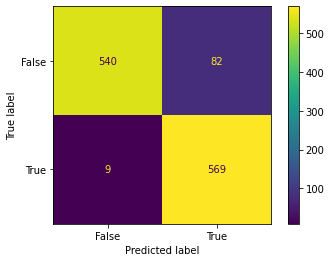

In [ ]:
# Create a prediction set
predictions = dtc.predict(X_test)

# Print a confusion matrix
cm = metrics.confusion_matrix(y_test, predictions, labels=dtc.classes_)

disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dtc.classes_)
disp.plot()

In [ ]:
# Classification report
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

       False       0.98      0.87      0.92       622
        True       0.87      0.98      0.93       578

    accuracy                           0.92      1200
   macro avg       0.93      0.93      0.92      1200
weighted avg       0.93      0.92      0.92      1200



In [ ]:
# Overall accuracy
print(metrics.accuracy_score(y_test, predictions))

0.9241666666666667


<a id="p5"></a>
## 5. Exercício

Teste outros algoritimos de [classificação](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html).

In [ ]:
# Import
...

# Create 
...

# Train
...

In [ ]:
# Create a prediction set
...

# Print a confusion matrix
...

In [ ]:
# Classification report
...

In [ ]:
# Overall accuracy
...

<a id="p6"></a>
## 6. Export

Se for necessário, você pode exportar o modelo treinado para ser utilizado em outra aplicação.

In [ ]:
# Select the desired model
model = dtc

In [ ]:
import joblib

# Save to file in the current working directory
joblib_file = "phishing_detection_mlmodel.pkl"
joblib.dump(model, joblib_file)

['phishing_detection_mlmodel.pkl']

### Exemplo de utilização de um modelo já treinado

In [ ]:
# Load from file
joblib_file = "phishing_detection_mlmodel.pkl"
joblib_model = joblib.load(joblib_file)

In [ ]:
# Calculate the accuracy and predictions
score = joblib_model.score(X_test, y_test)
print("Test score: {0:.2f} %".format(100 * score))

Test score: 92.42 %


In [ ]:
# Prediction test
y_predict = joblib_model.predict(X_test)
y_predict

array([False,  True, False, ..., False, False,  True])

[Exemplo](https://towardsdatascience.com/deploying-scikit-learn-models-at-scale-f632f86477b8) de _deploy_ de um modelo treinado na Google Cloud. 